In [58]:
# Cleaning : Outliers , NAN                     done
# Preprocessing : encoding ,Normalization       done
# Linear Regression                             done

# Cleaning

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [62]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [63]:
Na_count = df.isna().sum()
Na_count

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [64]:
Na_columns = Na_count[Na_count > 0]

In [65]:
Na_columns = Na_columns.sort_values(ascending=False)
Na_columns

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [66]:
columns_to_drop = ['Id','PoolQC' , 'MiscFeature' , 'Alley' , 'Fence' , 'MasVnrType' , 'FireplaceQu' , 'YrSold' ]
df.drop(columns_to_drop , inplace = True , axis = 1)

In [67]:
cols = df.columns.tolist()

In [68]:
for column in cols :
        if pd.api.types.is_numeric_dtype(df[column]):
                Q1 = df[column].quantile(0.25)
                Q2 = df[column].quantile(0.50)
                Q3 = df[column].quantile(0.75)
                IQR = Q3-Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
 #               outliers    = df[(df[column] < lower_bound) | (df[column] > upper_bound) ] 
                mean_val = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)].mean()
                df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_val

In [69]:
Na_columns = df.isna().sum()[df.isna().sum() > 0]

In [70]:
show_NA_cols = Na_columns.index.to_list()

In [71]:
df[show_NA_cols]

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [72]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending = False)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64

In [73]:
Mean_replaced_Nas = ['LotFrontage' , 'MasVnrArea' , 'GarageYrBlt']
Mode_replaced_Nas = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']

In [74]:
df[Mean_replaced_Nas] = df[Mean_replaced_Nas].fillna(df[Mean_replaced_Nas].mean())

In [75]:
df.isna().sum()[df.isna().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [76]:
for i in range (len(Mode_replaced_Nas)):
    mode_value = df[Mode_replaced_Nas[i]].mode()[0]
    df[Mode_replaced_Nas[i]] =df[Mode_replaced_Nas[i]].fillna(mode_value)

In [77]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

# Preprocessing

In [78]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61.0,0,0,0,0,0,2.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0,0,0,0,0,5.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42.0,0,0,0,0,0,9.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35.0,0,0,0,0,0,2.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84.0,0,0,0,0,0,12.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40.0,0,0,0,0,0,8.0,WD,Normal,175000.0
1456,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0,0,0,0,0,2.0,WD,Normal,210000.0
1457,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60.0,0,0,0,0,0,5.0,WD,Normal,266500.0
1458,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0,0,0,0,0,4.0,WD,Normal,142125.0


In [79]:
df.columns.to_list()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch'

In [80]:
x_train = df.iloc[: , :-1]
x_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,61.0,0,0,0,0,0,2.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298.000000,0.0,0,0,0,0,0,5.0,WD,Normal
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,42.0,0,0,0,0,0,9.0,WD,Normal
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.000000,35.0,0,0,0,0,0,2.0,WD,Abnorml
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192.000000,84.0,0,0,0,0,0,12.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,40.0,0,0,0,0,0,8.0,WD,Normal
1456,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,349.000000,0.0,0,0,0,0,0,2.0,WD,Normal
1457,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,60.0,0,0,0,0,0,5.0,WD,Normal
1458,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,366.000000,0.0,0,0,0,0,0,4.0,WD,Normal


In [81]:
y_train = df.loc[ : , 'SalePrice']
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [82]:
#numerical_columns = x_train.select_dtypes(include=['number'])

In [83]:
non_numerical_columns = x_train.select_dtypes(exclude=['number'])
non_numerical_columns.columns.tolist()


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [84]:
Label_Encoded_cols = ['OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','GarageQual','GarageCond','OverallQual','BsmtFinType1' , 'BsmtFinType2']
One_Hot_Encoded_cols = [col for col in non_numerical_columns if col not in Label_Encoded_cols]

 GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
       
 Ex	Excellent
  Gd	Good
  TA	Average/Typical
  Fa	Fair
  NA	No Pool
       
       
       
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence       
       
       
       
  

In [85]:
label_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0,
    'GLQ':6 , 'ALQ' : 5 , 'BLQ' : 4 , 'Rec' : 3 , 'LwQ' : 2 , 'Unf' : 1 , 'NA' : 0 , 
    'GdPrv' : 4 , 'MnPrv' : 3 , 'GdWo' : 2 , 'MnWw' : 1 , 'NA' : 0  
    
}

In [86]:
def label_encode(df, columns, mappings, default_value=0):
    for column in columns:
        df[column] = df[column].map(mappings).fillna(default_value)
    return df

In [87]:
x_train = label_encode(x_train, Label_Encoded_cols, label_mapping)

In [88]:
x_train['ExterCond'].value_counts()

ExterCond
3.0    1282
4.0     146
2.0      28
5.0       3
0.0       1
Name: count, dtype: int64

In [89]:
x_train = pd.get_dummies(x_train, columns=One_Hot_Encoded_cols , drop_first=True)

In [90]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,0.0,0.0,2003.0,2003.0,196.0,4,3.0,...,False,False,False,False,True,False,False,False,True,False
1,20.0,80.0,9600.0,0.0,0.0,1976.0,1976.0,0.0,3,3.0,...,False,False,False,False,True,False,False,False,True,False
2,60.0,68.0,11250.0,0.0,0.0,2001.0,2002.0,162.0,4,3.0,...,False,False,False,False,True,False,False,False,True,False
3,70.0,60.0,9550.0,0.0,0.0,1915.0,1970.0,0.0,3,3.0,...,False,False,False,False,True,False,False,False,False,False
4,60.0,84.0,14260.0,0.0,0.0,2000.0,2000.0,350.0,4,3.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,0.0,0.0,1999.0,2000.0,0.0,3,3.0,...,False,False,False,False,True,False,False,False,True,False
1456,20.0,85.0,13175.0,0.0,0.0,1978.0,1988.0,119.0,3,3.0,...,False,False,False,False,True,False,False,False,True,False
1457,70.0,66.0,9042.0,0.0,0.0,1941.0,2006.0,0.0,5,4.0,...,False,False,False,False,True,False,False,False,True,False
1458,20.0,68.0,9717.0,0.0,0.0,1950.0,1996.0,0.0,3,3.0,...,False,False,False,False,True,False,False,False,True,False


In [91]:
boolean_columns = x_train.select_dtypes(include='bool').columns

In [92]:
x_train[boolean_columns] = x_train[boolean_columns].astype(int)

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train) , columns = x_train.columns , index = x_train.index)

In [95]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.4,0.432099,0.430099,0.0,0.0,0.944,0.883333,0.472289,0.666667,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.617284,0.501174,0.0,0.0,0.728,0.433333,0.000000,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.4,0.469136,0.603152,0.0,0.0,0.928,0.866667,0.390361,0.666667,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.5,0.370370,0.498084,0.0,0.0,0.240,0.333333,0.000000,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.666667,0.789184,0.0,0.0,0.920,0.833333,0.843373,0.666667,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.4,0.395062,0.397157,0.0,0.0,0.912,0.833333,0.000000,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.679012,0.722126,0.0,0.0,0.744,0.633333,0.286747,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.5,0.444444,0.466687,0.0,0.0,0.448,0.933333,0.000000,1.000000,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.469136,0.508405,0.0,0.0,0.520,0.766667,0.000000,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Linear Regression

In [127]:
np.random.seed(42)

In [128]:
m = x_train.shape[1]
init_w = np.random.randn(m)*0.01
b = 0

In [129]:
def predict(w , x , b):
    return np.dot(x , w) + b

In [130]:
def cost_fnc(y_hat , y):
    m = len(y)
    return (1/(2*m)) * ( np.sum(pow(( y_hat - y ) , 2) ) )

In [131]:
x_train.shape[0]

1460

In [132]:
def gradient_descent(x , y , w , b , lr , epochs):
    loss = []
    epoch = []
    c = 0
    m = x.shape[0] # rows
    for i in range(epochs):
        y_hat = predict(w , x , b)
        d_dw = (1/m)*(np.dot(x.T , (y_hat - y))) #198 , 0 
        d_db = (1/m)*(y_hat - y)
        w -= lr*d_dw
        b -= lr*d_db
        if (i % 1000 == 0):
            epoch.append(i)
            loss.append(cost_fnc(y, y_hat))
            c = c+1
            if (i % 10000 == 0):
                print(f"Epoch {i}, Loss: {loss[c-1]}")
    return w , b , loss , epoch       

In [133]:
lr = 0.08
epochs = 210001
final_w , final_b , loss , epoch = gradient_descent(x_train , y_train , init_w , b , lr , epochs)

Epoch 0, Loss: 16169963318.49109
Epoch 10000, Loss: 115412376.72346304
Epoch 20000, Loss: 38031232.24095948
Epoch 30000, Loss: 12639352.502503013
Epoch 40000, Loss: 4213388.277023159
Epoch 50000, Loss: 1406359.9511410547
Epoch 60000, Loss: 469699.7090609591
Epoch 70000, Loss: 156918.4394736159
Epoch 80000, Loss: 52432.16946541891
Epoch 90000, Loss: 17521.133741120437
Epoch 100000, Loss: 5855.330611702584
Epoch 110000, Loss: 1956.845976039574
Epoch 120000, Loss: 653.9922644692117
Epoch 130000, Loss: 218.57276429738533
Epoch 140000, Loss: 73.05077290411658
Epoch 150000, Loss: 24.415043183372603
Epoch 160000, Loss: 8.160055409290958
Epoch 170000, Loss: 2.727287718289398
Epoch 180000, Loss: 0.9115291175638426
Epoch 190000, Loss: 0.30465724533589916
Epoch 200000, Loss: 0.10182480293101118
Epoch 210000, Loss: 0.03403271058010822


In [138]:
y_hat = predict(final_w , x_train , final_b)

In [139]:
cost_fnc(y_hat , y_train)

0.03402898103452145

<function matplotlib.pyplot.show(close=None, block=None)>

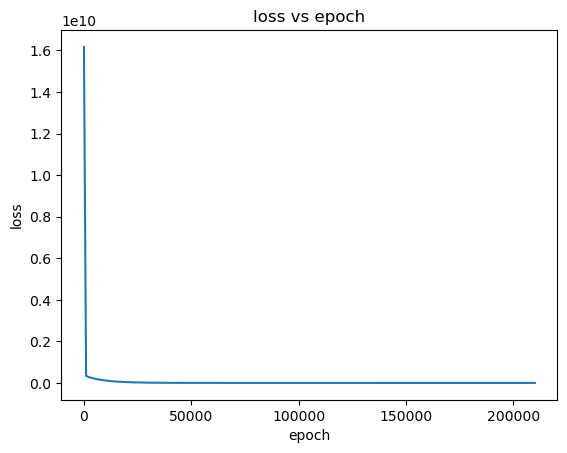

In [140]:
plt.plot(epoch , loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epoch')
plt.show()